# Decision Tree Algorithm Implementation

### Decision Trees Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## load data set

In [95]:
from pydataset import data
iris=data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
iris.Species=iris.Species.map({'setosa':0, 'versicolor':1, 'virginica':2})

In [10]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [15]:
# create X and y   independent variables and dependent variable
X=iris.drop(axis=1,columns='Species')                      #.iloc[:,:-1]
X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [18]:
y=iris.Species
y.head()

1    0
2    0
3    0
4    0
5    0
Name: Species, dtype: int64

### train test split the data 


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,stratify=y)

### model building using DecisionTreeClassifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
DTC_Model=DecisionTreeClassifier(criterion='gini').fit(X_train,y_train)                   #criterion='entropy'
DTC_Model

DecisionTreeClassifier()

## Attributes of DecisionTreeClassifier Model Object

In [40]:
DTC_Model.classes_

array([0, 1, 2], dtype=int64)

In [52]:
DTC_Model.feature_importances_

array([0.00803635, 0.01785857, 0.08314738, 0.89095769])

In [42]:
sum(DTC_Model.feature_importances_)

1.0

In [27]:
DTC_Model.max_features_

4

In [28]:
DTC_Model.n_classes_

3

In [29]:
DTC_Model.n_features_in_

4

In [30]:
DTC_Model.feature_names_in_

array(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'],
      dtype=object)

In [31]:
DTC_Model.n_outputs_

1

In [32]:
DTC_Model.tree_

### Visualize the Decision Tree

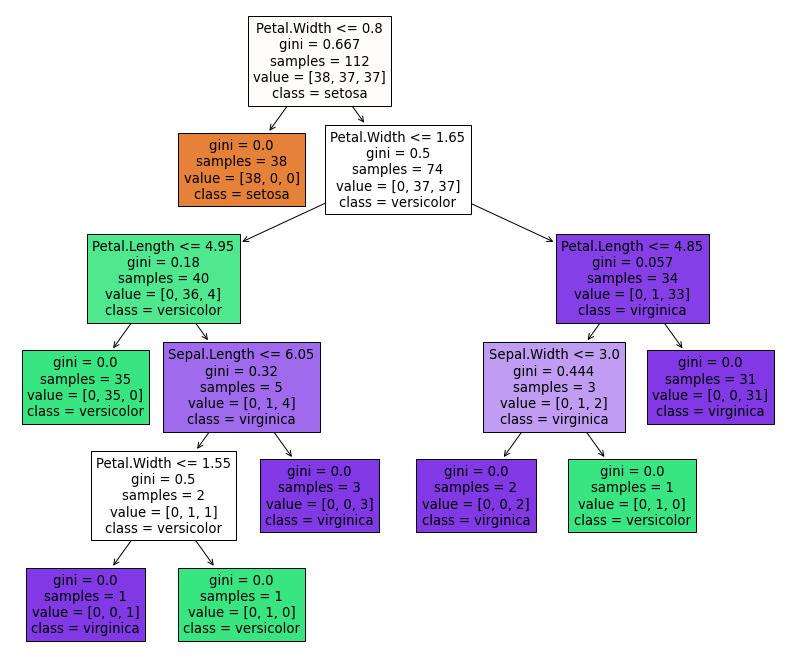

In [53]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,12))
plot_tree(DTC_Model,filled=True,feature_names=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'],class_names=['setosa', 'versicolor', 'virginica'])
plt.show()

### Model Performance Evaluation

In [59]:
DTC_Model.score(X_test,y_test)

0.9736842105263158

### Model prediction 

In [62]:
y_pred=DTC_Model.predict(X_test)
y_pred

array([2, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1], dtype=int64)

### Error and Performance metrics for classification 

In [65]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

<AxesSubplot:>

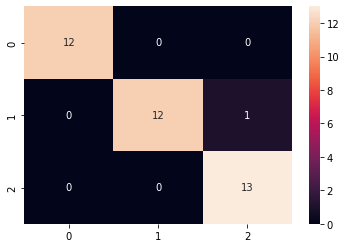

In [69]:
sns.heatmap(cm,annot=True)

In [71]:
#sklearn.metrics.accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9736842105263158

In [74]:
#sklearn.metrics.classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



### Create an Application

In [ ]:
'Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'

In [88]:
data=input("Enter the 'Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'")
sl,sw,pl,pw=[float(i) for i in data.split(',')]
new_data=[[sl,sw,pl,pw]]
if DTC_Model.predict(new_data)[0]==0:
    print("Predicted Species is:Setosa")
elif DTC_Model.predict(new_data)[0]==1:
    print("Predicted Species is:versicolor")
else:
    print("Predicted Species is:virginica")

Enter the 'Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'2.2,3.5,4,5.5
Predicted Species is:versicolor


C:\Users\karthick\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\karthick\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


['2.2', '3.5', '4', '5.5']

In [85]:
DTC_Model.predict(new_data)[0]

C:\Users\karthick\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [ ]:
class_names=['setosa', 'versicolor', 'virginica'])

# Decision Trees Regression

In [96]:
# load Data Set

In [99]:
file='https://raw.githubusercontent.com/Edubridge-karthik/EXL-CHENNAI---8410-and-PUNE-8414-DA--Batch/main/EXL-CHENNAI%20and%20PUNE-%20DA/Machine%20Learning%20algorithm/cereal.csv'
cereal_rating=pd.read_csv(file)
cereal_rating.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [100]:
cereal_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [103]:
cereal_rating.mfr.unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [105]:
cereal_rating.mfr=cereal_rating.mfr.map({'N':0, 'Q':1, 'K':2, 'R':3, 'G':4, 'P':5, 'A':6})

In [104]:
cereal_rating.type.unique()

array(['C', 'H'], dtype=object)

In [106]:
cereal_rating.type=cereal_rating.type.map({'C':0, 'H':1})

In [107]:
cereal_rating.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,0,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,1,0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,2,0,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,2,0,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,3,0,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [110]:
X=cereal_rating.iloc[:,1:-1]
X.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,0,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,1,0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,2,0,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,2,0,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,3,0,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75


In [112]:
y=cereal_rating.rating
y.head()

0    68.402973
1    33.983679
2    59.425505
3    93.704912
4    34.384843
Name: rating, dtype: float64

In [113]:
#train test split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123)

In [114]:
from sklearn.tree import DecisionTreeRegressor
DCTR_model=DecisionTreeRegressor().fit(X_train,y_train)

In [115]:
DCTR_model

DecisionTreeRegressor()

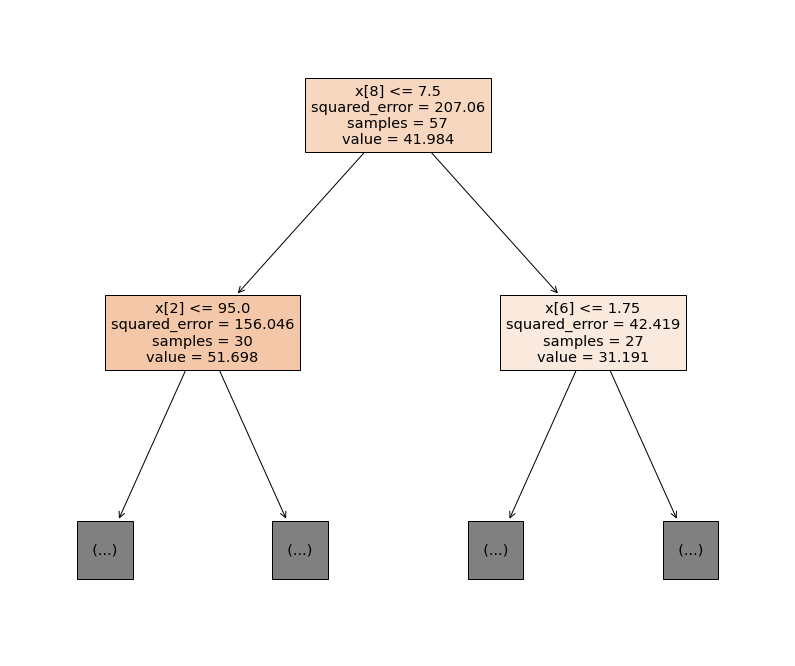

In [118]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,12))
plot_tree(DCTR_model,filled=True,max_depth=1)
plt.show()